In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot



# Introduction to Classification with K-Nearest Neighbors (KNN)

## The Data Set

This section introduces the data set used for our classification task. We'll be working with the MNIST dataset, which is widely used in the field of machine learning for image classification tasks.

* The content in this section is based on Chapter 3 of the book ["Hands-On Machine Learning with Scikit-Learn and TensorFlow"](http://shop.oreilly.com/product/0636920052289.do).

### MNIST Dataset

Before diving into the specifics of K-Nearest Neighbors (KNN) for classification, it's crucial to understand the data we are dealing with. This section will guide you through the data's characteristics, why certain measures of accuracy may be misleading, and how to better evaluate our model's performance.

We're working with a dataset where instances are classified into digits from 0 to 9, and our focus is on identifying the digit 5. However, this dataset is imbalanced - meaning the number of instances representing a '5' is significantly lower than those representing other digits. Specifically, out of 60,000 instances, only 5,421 are fives. 

The MNIST dataset consists of a collection of grayscale images, each with dimensions of 28x28 pixels. The task is to classify these images into their respective digits based on their pixel values.



In [6]:
data = pd.read_csv("https://www.dropbox.com/s/ogpo3ur00qcgvuw/mnist.tsv?dl=1", index_col=[0], sep="\t")

data.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_775,Pixel_776,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### about the data

* The dataset includes 70,000 instances, with each instance having 784 pixel values (28x28). Additionally, there's a "target" column that represents the actual digit corresponding to each image.


In [7]:
X, y = data.iloc[:, 0:-1], data['target']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70000, 784)
y shape: (70000,)


### Data Splitting

To train and evaluate our classification model, we need to split the data into training and testing sets. In this dataset, the first 60,000 instances are considered the training data, and the remaining 10,000 instances are for testing.

However, the data is initially ordered by class, with all 0s first, followed by all 1s, and so on. To ensure that our training and testing sets are representative and not biased by class order, we'll shuffle the data.



In [8]:
X.iloc[36000].head(20)

Pixel_0     0
Pixel_1     0
Pixel_2     0
Pixel_3     0
Pixel_4     0
Pixel_5     0
Pixel_6     0
Pixel_7     0
Pixel_8     0
Pixel_9     0
Pixel_10    0
Pixel_11    0
Pixel_12    0
Pixel_13    0
Pixel_14    0
Pixel_15    0
Pixel_16    0
Pixel_17    0
Pixel_18    0
Pixel_19    0
Name: 36000, dtype: int64

### Exploring a Single Instance
* Let's also take a look at the actual target label for this example.

In [9]:
some_digit = X.iloc[36000]
y[36000]

5

### Splitting and Shuffling the Data

Now, we'll perform the data splitting and shuffling:

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


### Binary Classifier for Digit "5"

* Here, we are going to build a binary classifier that distinguishes between the digit "5" against all other digits in the MNIST dataset.


* To create a binary classifier, we'll first define a new target variable for our classification task. This variable will be True if the digit is "5" and False for all other digits.

In [12]:
y_train

38603    6
18892    3
3321     0
55073    9
55143    9
        ..
30477    4
31014    5
55052    9
35746    5
52468    8
Name: target, Length: 60000, dtype: int64

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
y_train_5

38603    False
18892    False
3321     False
55073    False
55143    False
         ...  
30477    False
31014     True
55052    False
35746     True
52468    False
Name: target, Length: 60000, dtype: bool

### Training a Classifier

We will use a simple classifier, the K Nearest Neighbor Classifier, to perform binary classification. The goal is to predict whether a given digit in the dataset is "5" or not.


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_cls = KNeighborsClassifier(n_neighbors=25)

knn_cls.fit(X_train, y_train_5)

KNeighborsClassifier(n_neighbors=25)

### Testing on a Single Value


* Now that our binary classifier is trained, we can test it on a single digit. 
  * Let's pick an example (some_digit) that we know represents the digit "5."

* The result should be array([ True]), indicating that our classifier correctly predicts that the digit is "5."  

In [31]:
knn_cls.predict(X.iloc[31986].values.reshape(1, -1))

/Users/mahdi/miniconda3/envs/temp/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Evaluating Classifier Performance: Basic Accuracy
  
  
* Initially, we might be tempted to evaluate our classifier based on simple accuracy - the ratio of correct predictions to the total number of instances. However, due to our dataset's imbalance, this method can be misleading. Even a naive classifier that predicts 'not-5' for all instances will achieve a high accuracy, roughly 90.97%. This phenomenon is known as the "accuracy paradox."


In [32]:

naive_accuracy = (len(X_train) - sum(y_train_5)) / len(X_train)
print(naive_accuracy)


0.90965



### Confusion Matrix

* A more reliable method for evaluation is by using a confusion matrix. This approach allows us to visualize the performance of our algorithm by categorizing predictions into true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). Ideally, for a perfect classifier, we would only see true positives and true negatives (i.e., zero false positives and negatives).


In [36]:
X_train.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
from sklearn.metrics import confusion_matrix

y_train_pred = knn_cls.predict(X_train.to_numpy())
conf_matrix = confusion_matrix(y_train_5, y_train_pred)


/Users/mahdi/miniconda3/envs/temp/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[54452   127]
 [  289  5132]]


In [38]:
conf_matrix


[[54452   127]
 [  289  5132]]


### Precision and Recall

* Beyond the confusion matrix, we delve into more nuanced metrics like precision and recall. 
  * Precision is the ratio of true positives to all positive predictions (TP + FP), indicating the accuracy of positive predictions. 
  * Recall, on the other hand, is the ratio of true positives to all actual positives (TP + FN), signifying how many actual positives were captured through prediction.


In [39]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
print(f"Precision: {precision}\nRecall: {recall}")


Precision: 0.9758509222285605
Recall: 0.9466888028039108


### F1 Score:
* The F1 score harmoniously combines precision and recall into one metric by taking their harmonic mean. 
* This score is particularly useful when you need a balance between precision and recall and is a better measure than accuracy on imbalanced datasets.

   It's important to note that precision and recall often move inversely, forming a tradeoff. Increasing precision typically reduces recall and vice versa. By using functions like `precision_recall_curve`, we can observe this relationship and identify a threshold that balances both according to our needs.


In [40]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Score: {f1}")


F1 Score: 0.9610486891385767


In [43]:

from sklearn.metrics import precision_recall_curve
y_train_probs = knn_cls.predict_proba(X_train.to_numpy())
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_probs[:,1])


/Users/mahdi/miniconda3/envs/temp/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Precision Recall Tradeoff

* By plotting these values against each other, we can better understand the tradeoff and choose an appropriate threshold that meets our specific classification requirements. This threshold adjustment is crucial in real-world applications where the costs of false positives and false negatives need to be carefully weighed.

* In the following sections, we'll explore how we can use the K-Nearest Neighbors algorithm to make predictions and how we can tune this model for better performance, especially in the context of our imbalanced dataset.


(0.0, 1.0)

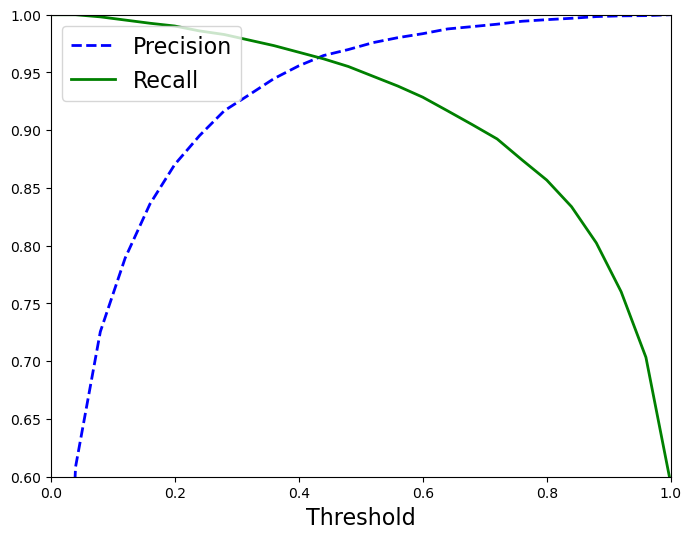

In [44]:
pyplot.figure(figsize=(8, 6))
pyplot.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
pyplot.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
pyplot.xlabel("Threshold", fontsize=16)
pyplot.legend(loc="upper left", fontsize=16)
pyplot.ylim([0.6, 1])
pyplot.xlim([0, 1])


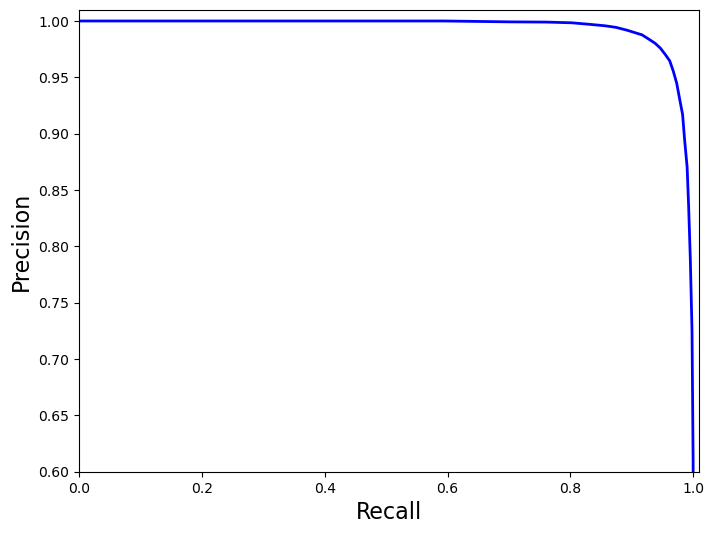

In [45]:
pyplot.figure(figsize=(8, 6))
pyplot.plot(recalls, precisions, "b-", linewidth=2)
pyplot.xlabel("Recall", fontsize=16)
pyplot.ylabel("Precision", fontsize=16)
_ = pyplot.axis([0, 1.01, 0.6, 1.01])



### Summary

* Precision:

  * Analogous to ensuring each chosen item genuinely meets the criteria. 
  * In manufacturing, it's the ratio of units correctly flagged as acceptable to all units deemed acceptable.
    * Example: Out of 100 units approved, if 20 are defective, precision is 80% (80/100).

* Recall:

  * Focuses on identifying all items that meet the criteria without missing any.
  * In manufacturing, it's the ratio of good units correctly identified to all good units present.
    * Example: If 150 out of 200 good units are identified, recall is 75% (150/200).


* F1 Score:
  * Important in contexts requiring a balance between precision and recall.
  * Harmonic mean of precision and recall, providing a combined performance measure.
    * Reflects on quality control, indicating areas needing improvement if low.

* General Importance: These metrics are vital for assessing the effectiveness and efficiency of various classification and approval processes.